# Case study on Pre-processing

#### 1. Load the dataset into python environment


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
#Reading data

data=pd.read_csv("titanic_dataset.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### 2. Make ‘PassengerId’ as the index column


In [3]:
data=data.set_index(['PassengerId'])
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### 3. Check the basic details of the dataset


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [5]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
data.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

#### 4. Fill in all the missing values present in all the columns in the dataset


In [7]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [8]:
#Since percentage of missing data is very high for cabin column,we drop that column.
data.drop(['Cabin'],axis=1,inplace=True)

In [9]:
data['Age']=data['Age'].fillna(data['Age'].median())

In [10]:
data['Embarked']=data['Embarked'].fillna(data['Embarked'].mode()[0])

In [11]:
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

#### 5. Check and handle outliers in at least 3 columns in the dataset


In [12]:
#outliers check on age

{'whiskers': [<matplotlib.lines.Line2D at 0x22134e48df0>,
 'caps': [<matplotlib.lines.Line2D at 0x22135504490>,
 'boxes': [<matplotlib.lines.Line2D at 0x22134e48ac0>],
 'medians': [<matplotlib.lines.Line2D at 0x22135504bb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x22135504f40>],
 'means': []}

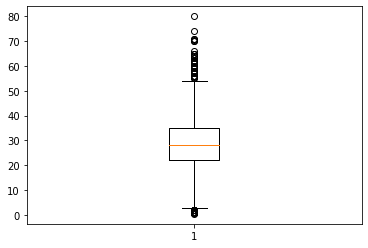

In [13]:
plt.boxplot(data['Age'])

In [14]:
Q1 = np.percentile(data['Age'], 25, interpolation = 'midpoint')
Q2 = np.percentile(data['Age'], 50, interpolation = 'midpoint')
Q3 = np.percentile(data['Age'], 75, interpolation = 'midpoint')

In [15]:
print (Q1)
print (Q2)
print (Q3)

22.0
28.0
35.0


In [16]:
IQR=Q3-Q1
low_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
print (low_limit)
print (upper_limit)

2.5
54.5


In [17]:
outlier=[]
for y in data['Age']:
    if((y>upper_limit) or (y<low_limit)):
       outlier.append(y)

In [18]:
outlier

[2.0,
 58.0,
 55.0,
 2.0,
 66.0,
 65.0,
 0.83,
 59.0,
 71.0,
 70.5,
 2.0,
 55.5,
 1.0,
 61.0,
 1.0,
 56.0,
 1.0,
 58.0,
 2.0,
 59.0,
 62.0,
 58.0,
 63.0,
 65.0,
 2.0,
 0.92,
 61.0,
 2.0,
 60.0,
 1.0,
 1.0,
 64.0,
 65.0,
 56.0,
 0.75,
 2.0,
 63.0,
 58.0,
 55.0,
 71.0,
 2.0,
 64.0,
 62.0,
 62.0,
 60.0,
 61.0,
 57.0,
 80.0,
 2.0,
 0.75,
 56.0,
 58.0,
 70.0,
 60.0,
 60.0,
 70.0,
 0.67,
 57.0,
 1.0,
 0.42,
 2.0,
 1.0,
 62.0,
 0.83,
 74.0,
 56.0]

In [19]:
ind1=data['Age']>upper_limit

In [20]:
data.loc[ind1].index

Int64Index([ 12,  16,  34,  55,  95,  97, 117, 153, 171, 175, 196, 233, 253,
            269, 276, 281, 327, 367, 439, 457, 468, 484, 488, 493, 494, 546,
            556, 571, 588, 626, 627, 631, 648, 660, 673, 685, 695, 746, 773,
            830, 852, 880],
           dtype='int64', name='PassengerId')

In [21]:
data.drop([ 12,  16,  34,  55,  95,  97, 117, 153, 171, 175, 196, 233, 253,
            269, 276, 281, 327, 367, 439, 457, 468, 484, 488, 493, 494, 546,
            556, 571, 588, 626, 627, 631, 648, 660, 673, 685, 695, 746, 773,
            830, 852, 880],inplace=True)

In [22]:
ind2=data['Age']<low_limit

In [23]:
data.loc[ind2].index

Int64Index([  8,  17,  79, 120, 165, 173, 184, 206, 298, 306, 341, 382, 387,
            470, 480, 531, 643, 645, 756, 789, 804, 825, 828, 832],
           dtype='int64', name='PassengerId')

In [24]:
data.drop([ 8,  17,  79, 120, 165, 173, 184, 206, 298, 306, 341, 382, 387,
            470, 480, 531, 643, 645, 756, 789, 804, 825, 828, 832],inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x2213560c220>,
 'caps': [<matplotlib.lines.Line2D at 0x2213560c940>,
 'boxes': [<matplotlib.lines.Line2D at 0x221355fee50>],
 'medians': [<matplotlib.lines.Line2D at 0x221356190a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x22135619430>],
 'means': []}

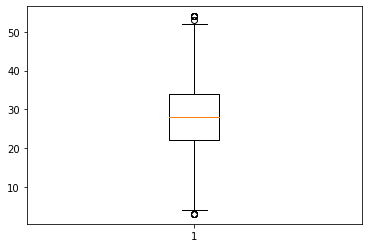

In [25]:
plt.boxplot(data['Age'])

In [26]:
#Outliers check on SibSp

{'whiskers': [<matplotlib.lines.Line2D at 0x2213565ddc0>,
 'caps': [<matplotlib.lines.Line2D at 0x22135669580>,
 'boxes': [<matplotlib.lines.Line2D at 0x2213565da30>],
 'medians': [<matplotlib.lines.Line2D at 0x22135669ca0>],
 'fliers': [<matplotlib.lines.Line2D at 0x22135677070>],
 'means': []}

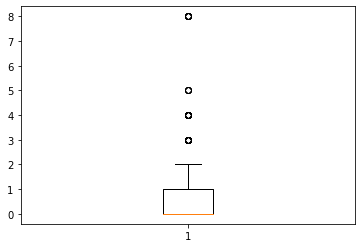

In [27]:
plt.boxplot(data['SibSp'])

In [28]:
Q1 = np.percentile(data['SibSp'], 25, interpolation = 'midpoint')
Q2 = np.percentile(data['SibSp'], 50, interpolation = 'midpoint')
Q3 = np.percentile(data['SibSp'], 75, interpolation = 'midpoint')

In [29]:
print (Q1)
print (Q2)
print (Q3)

0.0
0.0
1.0


In [30]:
IQR=Q3-Q1
low_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
print (low_limit)
print (upper_limit)

-1.5
2.5


In [31]:
outlier=[]
for y in data['SibSp']:
    if((y>upper_limit) or (y<low_limit)):
       outlier.append(y)

In [32]:
outlier

[3,
 3,
 4,
 5,
 3,
 4,
 5,
 3,
 3,
 8,
 4,
 3,
 8,
 4,
 8,
 3,
 4,
 4,
 4,
 4,
 8,
 3,
 3,
 3,
 5,
 3,
 4,
 4,
 3,
 5,
 4,
 3,
 4,
 8,
 4,
 3,
 8,
 4,
 8]

In [33]:
ind1=data['SibSp']>upper_limit

In [34]:
data.loc[ind1].index

Int64Index([ 25,  28,  51,  60,  64,  69,  72,  86,  89, 160, 172, 177, 181,
            183, 202, 230, 234, 262, 267, 279, 325, 342, 375, 410, 481, 486,
            542, 543, 635, 684, 687, 727, 788, 793, 814, 820, 847, 851, 864],
           dtype='int64', name='PassengerId')

In [35]:
data.drop([25,  28,  51,  60,  64,  69,  72,  86,  89, 160, 172, 177, 181,
            183, 202, 230, 234, 262, 267, 279, 325, 342, 375, 410, 481, 486,
            542, 543, 635, 684, 687, 727, 788, 793, 814, 820, 847, 851, 864],inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x221356e4820>,
 'caps': [<matplotlib.lines.Line2D at 0x221356e4f40>,
 'boxes': [<matplotlib.lines.Line2D at 0x221356e4490>],
 'medians': [<matplotlib.lines.Line2D at 0x221356f16a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x221356f1a30>],
 'means': []}

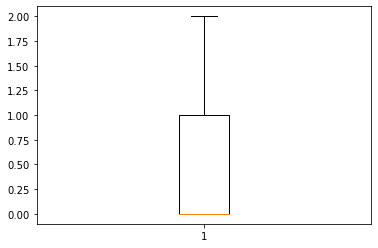

In [36]:
plt.boxplot(data['SibSp'])

In [37]:
#Outliers check on fare

{'whiskers': [<matplotlib.lines.Line2D at 0x22135757550>,
 'caps': [<matplotlib.lines.Line2D at 0x22135757c70>,
 'boxes': [<matplotlib.lines.Line2D at 0x221357571c0>],
 'medians': [<matplotlib.lines.Line2D at 0x221357643d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x22135764760>],
 'means': []}

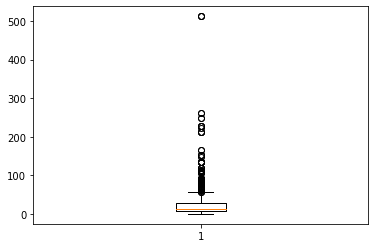

In [38]:
plt.boxplot(data['Fare'])

In [39]:
Q1 = np.percentile(data['Fare'], 25, interpolation = 'midpoint')
Q2 = np.percentile(data['Fare'], 50, interpolation = 'midpoint')
Q3 = np.percentile(data['Fare'], 75, interpolation = 'midpoint')

In [40]:
print (Q1)
print (Q2)
print (Q3)

7.8958
13.0
27.75


In [41]:
IQR=Q3-Q1
low_limit=Q1-3.5*IQR
upper_limit=Q3+3.5*IQR
print (low_limit)
print (upper_limit)

-61.5939
97.2397


In [42]:
outlier=[]
for y in data['Fare']:
    if((y>upper_limit) or (y<low_limit)):
       outlier.append(y)

In [43]:
outlier

[146.5208,
 247.5208,
 113.275,
 512.3292,
 135.6333,
 247.5208,
 110.8833,
 108.9,
 262.375,
 164.8667,
 134.5,
 135.6333,
 153.4625,
 133.65,
 134.5,
 135.6333,
 211.5,
 227.525,
 120.0,
 113.275,
 120.0,
 151.55,
 108.9,
 221.7792,
 106.425,
 106.425,
 110.8833,
 227.525,
 110.8833,
 153.4625,
 133.65,
 512.3292,
 211.3375,
 110.8833,
 227.525,
 151.55,
 227.525,
 211.3375,
 512.3292,
 262.375,
 120.0,
 211.3375,
 120.0,
 164.8667]

In [44]:
ind1=data['Fare']>upper_limit

In [45]:
data.loc[ind1].index

Int64Index([ 32, 119, 216, 259, 270, 300, 307, 308, 312, 319, 320, 326, 333,
            335, 338, 374, 378, 381, 391, 394, 436, 499, 506, 528, 538, 545,
            551, 558, 582, 610, 661, 680, 690, 699, 701, 709, 717, 731, 738,
            743, 764, 780, 803, 857],
           dtype='int64', name='PassengerId')

In [46]:
data.drop([32, 119, 216, 259, 270, 300, 307, 308, 312, 319, 320, 326, 333,
            335, 338, 374, 378, 381, 391, 394, 436, 499, 506, 528, 538, 545,
            551, 558, 582, 610, 661, 680, 690, 699, 701, 709, 717, 731, 738,
            743, 764, 780, 803, 857],inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x221357bfd60>,
 'caps': [<matplotlib.lines.Line2D at 0x221357ce4c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x221357bf9d0>],
 'medians': [<matplotlib.lines.Line2D at 0x221357cebe0>],
 'fliers': [<matplotlib.lines.Line2D at 0x221357cef70>],
 'means': []}

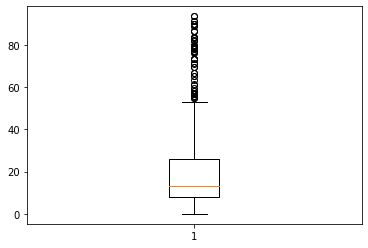

In [47]:
plt.boxplot(data['Fare'])

In [48]:
#Dropping columns name and ticket as they have no significance
data.drop(['Name','Ticket'],axis=1,inplace=True)
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,13.0000,S
888,1,1,female,19.0,0,0,30.0000,S
889,0,3,female,28.0,1,2,23.4500,S


#### 6. Do min max scaling on the feature set (Take ‘Survived’ as target)

In [49]:
# performing dummy encoding on data set

In [50]:
data.Sex.nunique()

2

In [51]:
data=pd.get_dummies(data,columns=['Sex'])

In [52]:
data=pd.get_dummies(data,columns=['Embarked'])

In [53]:
data

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,
1,0,3,22.0,1,0,7.2500,0,1,0,0,1
2,1,1,38.0,1,0,71.2833,1,0,1,0,0
3,1,3,26.0,0,0,7.9250,1,0,0,0,1
4,1,1,35.0,1,0,53.1000,1,0,0,0,1
5,0,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,27.0,0,0,13.0000,0,1,0,0,1
888,1,1,19.0,0,0,30.0000,1,0,0,0,1
889,0,3,28.0,1,2,23.4500,1,0,0,0,1


In [54]:
X=data.drop(['Survived'],axis=1)

In [55]:
X.describe()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,2.396226,28.998652,0.299191,0.273585,21.115846,0.331536,0.668464,0.168464,0.094340,0.737197
std,0.785762,9.766505,0.518978,0.746980,20.619129,0.471083,0.471083,0.374530,0.292498,0.440453
min,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,23.625000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,28.000000,0.000000,0.000000,13.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,3.000000,34.000000,1.000000,0.000000,26.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,3.000000,54.000000,2.000000,6.000000,93.500000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#performing minmax scaling

In [56]:
from sklearn.preprocessing import MinMaxScaler

In [57]:
min_max=MinMaxScaler(feature_range=(0,1))

In [58]:
X=min_max.fit_transform(X)

In [59]:
X=pd.DataFrame(X)

In [60]:
X.describe()

,0,1,2,3,4,5,6,7,8,9
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,0.698113,0.509777,0.149596,0.045597,0.225838,0.331536,0.668464,0.168464,0.094340,0.737197
std,0.392881,0.191500,0.259489,0.124497,0.220525,0.471083,0.471083,0.374530,0.292498,0.440453
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.404412,0.000000,0.000000,0.084447,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.490196,0.000000,0.000000,0.139037,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,0.607843,0.500000,0.000000,0.278075,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
